# Non Graded Challenge 10

`Dicky Librata Sembiring`\
`Hactive8 Student`\
`FTDS Batch 003` 

### Objective
Pada Non Graded Challenge berikut berisi :
1. Mencari measure of central tendency
2. Mencari variance dari sebuah data set

#### Import Pustaka

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.display.max_columns = 100

#### Answer

Baca data dari csv dan cek info

In [14]:
df = pd.read_csv('covid_19_indonesia_time_series_all.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

Select data numerik

In [15]:
df_num = df.select_dtypes(include=np.number)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   New Cases                    31822 non-null  int64  
 1   New Deaths                   31822 non-null  int64  
 2   New Recovered                31822 non-null  int64  
 3   New Active Cases             31822 non-null  int64  
 4   Total Cases                  31822 non-null  int64  
 5   Total Deaths                 31822 non-null  int64  
 6   Total Recovered              31822 non-null  int64  
 7   Total Active Cases           31822 non-null  int64  
 8   City or Regency              0 non-null      float64
 9   Total Regencies              31822 non-null  int64  
 10  Total Cities                 30921 non-null  float64
 11  Total Districts              31822 non-null  int64  
 12  Total Urban Villages         30918 non-null  float64
 13  Total Rural Vill

Cek dan Handle missing value

In [16]:
df_num.isnull().sum()

New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
City or Regency                31822
Total Regencies                    0
Total Cities                     901
Total Districts                    0
Total Urban Villages             904
Total Rural Villages             929
Area (km2)                         0
Population                         0
Population Density                 0
Longitude                          0
Latitude                           0
New Cases per Million              0
Total Cases per Million            0
New Deaths per Million             0
Total Deaths per Million           0
Total Deaths per 100rb             0
Growth Factor of New Cases      1939
Growth Factor of New Deaths     3447
dtype: int64

Handling Missing Value Kolom City or Regency

In [17]:
df_num['City or Regency'].value_counts()

Series([], Name: City or Regency, dtype: int64)

In [18]:
# Drop kolom city or regency karena tidak memiliki data apa pun
df_num.drop(columns='City or Regency', inplace=True)

Cek distribusi kolom yang ada missing value

Skewness value Total Cities :  5.414859985068091
Skewness value Total Urban Villages :  5.386605547155009
Skewness value Total Rural Villages :  5.36153307069668
Skewness value Growth Factor of New Cases :  24.129051011679582
Skewness value Growth Factor of New Deaths :  39.289569553723936


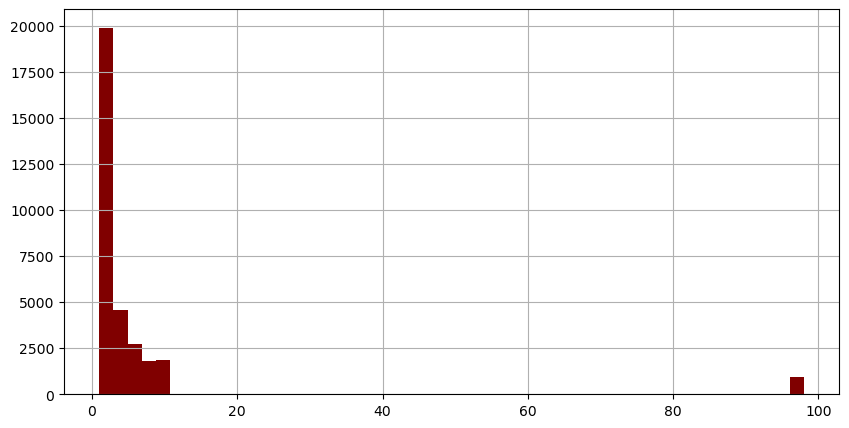

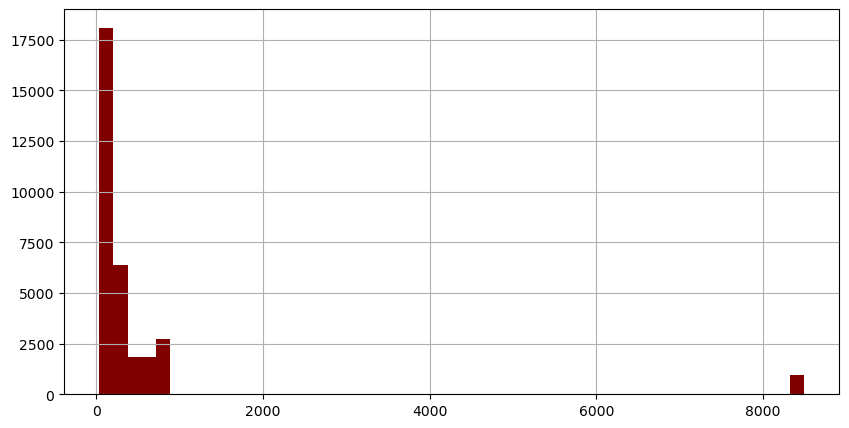

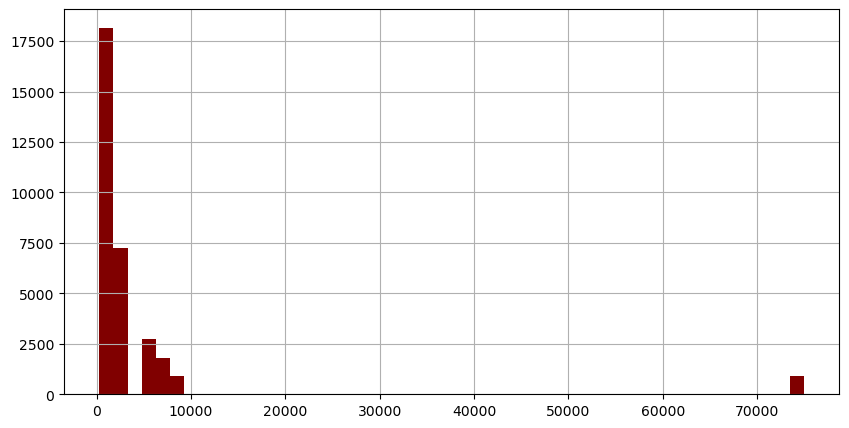

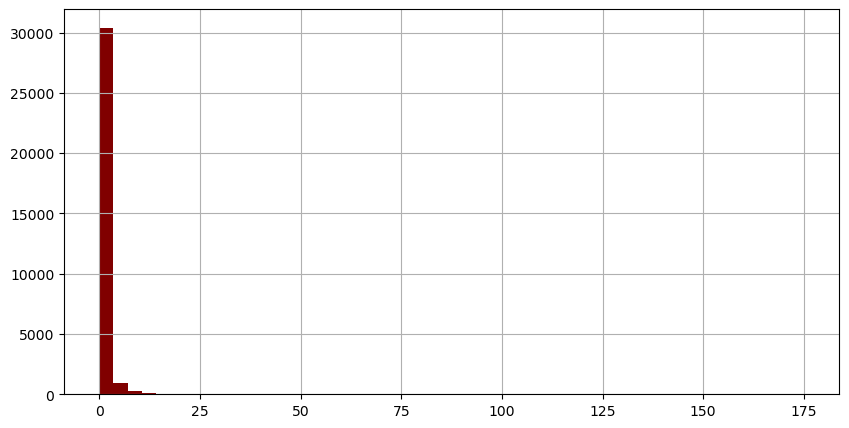

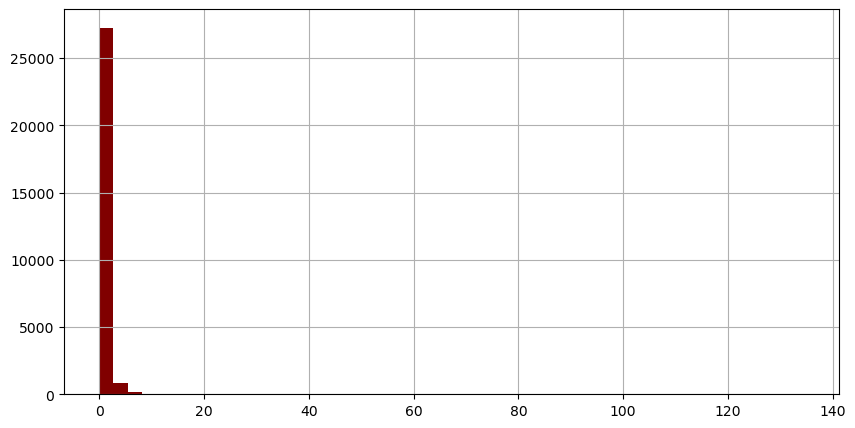

In [42]:
print('Skewness value Total Cities : ', df_num['Total Cities'].skew())
print('Skewness value Total Urban Villages : ', df_num['Total Urban Villages'].skew())
print('Skewness value Total Rural Villages : ', df_num['Total Rural Villages'].skew())
print('Skewness value Growth Factor of New Cases : ', df_num['Growth Factor of New Cases'].skew())
print('Skewness value Growth Factor of New Deaths : ', df_num['Growth Factor of New Deaths'].skew())

df_num['Total Cities'].hist(bins=50, figsize=(10,5), color='maroon')
plt.show()
df_num['Total Urban Villages'].hist(bins=50, figsize=(10,5), color='maroon')
plt.show()
df_num['Total Rural Villages'].hist(bins=50, figsize=(10,5), color='maroon')
plt.show()
df_num['Growth Factor of New Cases'].hist(bins=50, figsize=(10,5), color='maroon')
plt.show()
df_num['Growth Factor of New Deaths'].hist(bins=50, figsize=(10,5), color='maroon')
plt.show()

Karena semua kolom memiliki distribusi tidak normal maka missing value di isi dengan median

In [46]:
df_num.fillna({
    'Total Cities' : df['Total Cities'].median(),
    'Total Urban Villages' : df['Total Urban Villages'].median(),
    'Total Rural Villages' : df['Total Rural Villages'].median(),
    'Growth Factor of New Cases' : df['Growth Factor of New Cases'].median(),
    'Growth Factor of New Deaths': df['Growth Factor of New Deaths'].median()    
},inplace=True)

Cek apakah sudah tidak ada missing value

In [47]:
df_num.isnull().sum()

New Cases                      0
New Deaths                     0
New Recovered                  0
New Active Cases               0
Total Cases                    0
Total Deaths                   0
Total Recovered                0
Total Active Cases             0
Total Regencies                0
Total Cities                   0
Total Districts                0
Total Urban Villages           0
Total Rural Villages           0
Area (km2)                     0
Population                     0
Population Density             0
Longitude                      0
Latitude                       0
New Cases per Million          0
Total Cases per Million        0
New Deaths per Million         0
Total Deaths per Million       0
Total Deaths per 100rb         0
Growth Factor of New Cases     0
Growth Factor of New Deaths    0
dtype: int64

#### Hasil

Measure of central tendency dan variance

In [60]:
df_num.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,31822.000000,31822.000000,31822.000000,31822.000000,3.182200e+04,31822.000000,3.182200e+04,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,3.182200e+04,3.182200e+04,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000
mean,402.311388,9.920652,390.398498,1.992238,1.594500e+05,4564.753221,1.492615e+05,5623.782415,24.027277,5.727233,417.952297,496.124694,4378.663472,1.106532e+05,1.536766e+07,738.894928,113.700478,-2.725681,28.133292,11485.038800,0.640308,289.633640,28.963329,1.306883,1.030169
std,2320.629838,64.139080,2199.878802,1219.513355,6.264435e+05,17693.731369,5.958536e+05,28537.412305,68.359734,16.168939,1192.995149,1402.800771,12407.123584,3.187865e+05,4.461714e+07,2729.431626,9.862068,3.608065,74.309710,16477.385479,1.933016,363.428724,36.342881,2.597639,1.276486
min,0.000000,0.000000,0.000000,-29938.000000,1.000000e+00,0.000000,0.000000e+00,-2343.000000,1.000000,1.000000,44.000000,35.000000,275.000000,6.640000e+02,6.484070e+05,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,-12.000000,5.223250e+03,128.000000,3.913500e+03,80.000000,7.000000,1.000000,103.000000,99.000000,928.000000,1.678700e+04,1.999539e+06,47.790000,106.109004,-6.204699,0.830000,1291.367500,0.000000,38.862500,3.890000,0.670000,0.880000
50%,27.000000,0.000000,20.000000,0.000000,2.359650e+04,565.500000,2.102750e+04,557.000000,11.000000,2.000000,169.000000,175.000000,1591.000000,4.201300e+04,4.216171e+06,103.840000,113.417654,-2.461746,5.710000,6804.285000,0.000000,158.415000,15.840000,1.000000,1.000000
75%,130.000000,3.000000,123.000000,19.000000,6.992775e+04,2189.000000,6.414200e+04,2279.000000,18.000000,4.000000,289.000000,332.000000,2853.000000,7.546800e+04,9.095591e+06,262.700000,121.201093,0.212037,22.290000,14557.360000,0.540000,389.910000,38.990000,1.250000,1.000000
max,64718.000000,2069.000000,61361.000000,39165.000000,6.405044e+06,157876.000000,6.218708e+06,586113.000000,416.000000,98.000000,7230.000000,8488.000000,74953.000000,1.916907e+06,2.651855e+08,16334.310000,138.696030,4.225615,1459.040000,130231.620000,63.800000,1632.600000,163.260000,175.000000,134.500000


In [65]:
df_num.var()

New Cases                      5.385323e+06
New Deaths                     4.113822e+03
New Recovered                  4.839467e+06
New Active Cases               1.487213e+06
Total Cases                    3.924314e+11
Total Deaths                   3.130681e+08
Total Recovered                3.550415e+11
Total Active Cases             8.143839e+08
Total Regencies                4.673053e+03
Total Cities                   2.614346e+02
Total Districts                1.423237e+06
Total Urban Villages           1.967850e+06
Total Rural Villages           1.539367e+08
Area (km2)                     1.016248e+11
Population                     1.990689e+15
Population Density             7.449797e+06
Longitude                      9.726039e+01
Latitude                       1.301813e+01
New Cases per Million          5.521933e+03
Total Cases per Million        2.715042e+08
New Deaths per Million         3.736552e+00
Total Deaths per Million       1.320804e+05
Total Deaths per 100rb         1